In [1]:
# Design Model (input, output, size, forward pass)
# Construct loss and optimizer
# Training loop
# - forward Pass : compute prediction
# - backward Pass : gradient
# - update weights

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))

In [8]:
y = Y.view(Y.shape[0],1)

In [9]:
n_samples, n_features = X.shape

In [10]:
model = nn.Linear(n_features, 1)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [11]:
num_epochs = 100
for epoch in range(num_epochs):
    y_pred = model(X) 
    l = loss(y, y_pred)
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch:{epoch+1}: loss={l.item():.4f}')

epoch:10: loss=4300.7607
epoch:20: loss=3211.3743
epoch:30: loss=2422.8713
epoch:40: loss=1851.5541
epoch:50: loss=1437.2015
epoch:60: loss=1136.4211
epoch:70: loss=917.9039
epoch:80: loss=759.0307
epoch:90: loss=643.4413
epoch:100: loss=559.2898


In [12]:
predicted = model(X).detach()

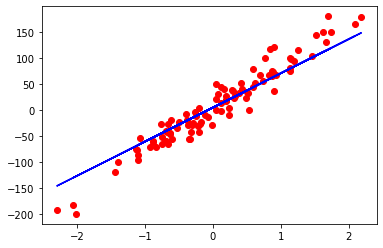

In [13]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()